<a href="https://colab.research.google.com/github/mc-friday/hanghaeAI/blob/main/%5B1%EC%A3%BC%EC%B0%A8%5D%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C1219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[기본과제] MNIST 분류(classification) 모델 구현


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# 데이터셋 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [5]:
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.49MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000
torch.Size([1, 28, 28]) 5


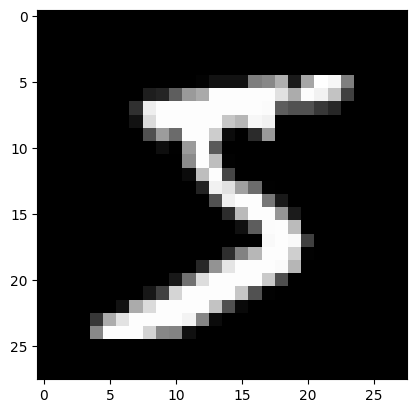

In [6]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [7]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

## Test data 준비하기

In [8]:
# Test 데이터
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False, #[MYCODE]train=False 로 설정
    download=True,
    transform=transform
)

In [9]:
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=256,
    shuffle=False #[MYCODE]shuffle=False 로 설정
)

10000
torch.Size([1, 28, 28]) 7


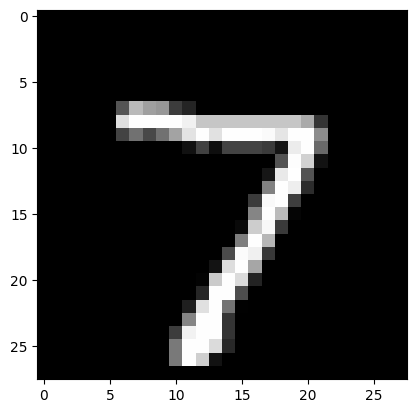

In [10]:
print(len(testset))
print(testset[0][0].shape, testset[0][1])
plt.imshow(testset[0][0][0], cmap='gray')

In [18]:
from torch import nn
class Model(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)  #[MYCODE]분류 문제이므로 클래스 개수만큼 출력

        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)  #[MYCODE]마지막 레이어는 활성화 함수 없음
        return x

##nn.CrossEntropyLoss 적용하기

In [19]:
from torch.optim import SGD

model = Model(28 * 28, 1024, 10).to('cuda')  #[MYCODE]MNIST는 10개의 클래스
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001)
n_epochs = 100

##model의 정확도를 측정하는 코드

In [20]:
def accuracy(model, dataloader):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt

##[LOG] 출력 결과

In [21]:
train_accs, test_accs = [], []

for epoch in range(n_epochs):
    total_loss = 0.0

    model.train()
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Epoch 끝난 후 Train/Test 정확도 측정
    model.eval()
    train_acc = accuracy(model, trainloader)
    test_acc = accuracy(model, testloader)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"[LOG] Epoch {epoch+1}/{n_epochs} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

[LOG] Epoch 1/100 | Loss: 528.3889 | Train Acc: 0.4932 | Test Acc: 0.5011
[LOG] Epoch 2/100 | Loss: 505.2327 | Train Acc: 0.5716 | Test Acc: 0.5844
[LOG] Epoch 3/100 | Loss: 479.2250 | Train Acc: 0.6370 | Test Acc: 0.6496
[LOG] Epoch 4/100 | Loss: 447.9483 | Train Acc: 0.6723 | Test Acc: 0.6841
[LOG] Epoch 5/100 | Loss: 411.2803 | Train Acc: 0.7088 | Test Acc: 0.7210
[LOG] Epoch 6/100 | Loss: 370.8355 | Train Acc: 0.7369 | Test Acc: 0.7466
[LOG] Epoch 7/100 | Loss: 330.1218 | Train Acc: 0.7588 | Test Acc: 0.7700
[LOG] Epoch 8/100 | Loss: 292.2813 | Train Acc: 0.7834 | Test Acc: 0.7937
[LOG] Epoch 9/100 | Loss: 259.6596 | Train Acc: 0.7996 | Test Acc: 0.8098
[LOG] Epoch 10/100 | Loss: 232.6125 | Train Acc: 0.8087 | Test Acc: 0.8166
[LOG] Epoch 11/100 | Loss: 210.6403 | Train Acc: 0.8202 | Test Acc: 0.8279
[LOG] Epoch 12/100 | Loss: 192.8818 | Train Acc: 0.8278 | Test Acc: 0.8366
[LOG] Epoch 13/100 | Loss: 178.5373 | Train Acc: 0.8365 | Test Acc: 0.8457
[LOG] Epoch 14/100 | Loss: 166.643


##epoch에 따른 model의 train과 test data에 대한 정확도 plot하기

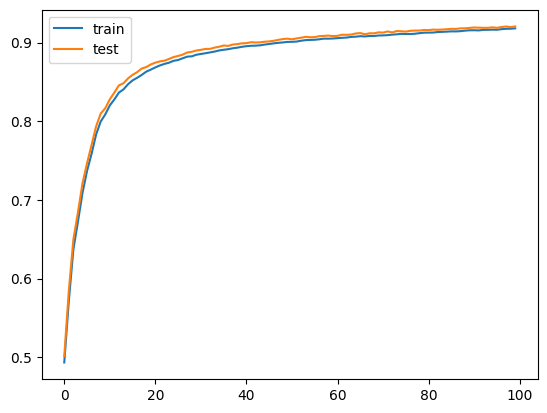

In [23]:
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_accs, test_accs)